In [307]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [279]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
combine = [train_df, test_df]

In [19]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


(891, 12)

In [27]:
# Ordinal category
train_df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [38]:
# Categorical features:
# Survived, Sex, Embarked
train_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [50]:
# Numerical features
# Age, Fare, SibSp, Parch
train_df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [60]:
# Mixed features with more than one type
train_df.Ticket.head(2)

0    A/5 21171
1     PC 17599
Name: Ticket, dtype: object

In [92]:
# Features containing blank, null or empty values
train_df.columns[train_df.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

In [193]:
# Percentage of null values - 19.8% are null entries for age
column = 'Age'
shape = train_df[column].shape

isna = train_df[column].isna().value_counts()
print(isna)
total_null_values = isna.values[1]
total_null_values/shape

False    714
True     177
Name: Age, dtype: int64


array([0.1986532])

In [121]:
# Data types of various features
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


0    549
1    342
Name: Survived, dtype: int64


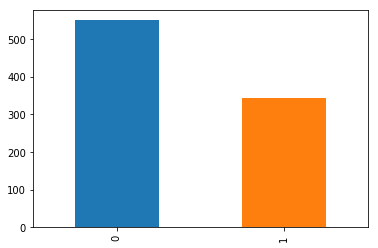

In [225]:
# How many people survived on Titanic - 342
print(train_df.Survived.value_counts())
train_df.Survived.value_counts().plot(kind='bar')

In [226]:
# Percentage of people survived
print(train_df.Survived.value_counts()/train_df.Survived.shape)

0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [130]:
# 76 % Passengers didn't travel with parents or childrens
train_df.Parch.value_counts()[0]/shape

array([0.76094276])

In [183]:
# 32% of Passengers travelling had siblings and/or spouse aboard
PSibSp = sum(train_df.SibSp.value_counts().tolist()[1:])
PSibSp/shape[0]

0.3176206509539843

In [184]:
# Fares variying significantly with few passengers (<1%) paying
# as high as $512
fare_sorted = train_df.sort_values(['Fare'], ascending=False)

# filter fare column only and count as well
fare_sorted.Fare.head(10).value_counts()

263.0000    4
512.3292    3
262.3750    2
247.5208    1
Name: Fare, dtype: int64

In [201]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Widener, Mr. Harry Elkins",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [197]:
# Total duplicate tickets - 22 %
1 - 681/891

0.23569023569023573

In [ ]:
# Correlating - We want to know how well does each feature correlate with Survival.
# Completing - We may want to complete Age feature as it is definitely correlated to survival.
# We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

# Drop features - Some features may be dropped since they don't
# contribute to Survival.
# Ticket, Cabin, passengerID, Name

# Creating new features
# Family - combine Parch and SibSp to get total count of family mebers on board.
# Title - extract from Name
# Age bands - This turns a continous numerical feature into an ordinal categorical feature.
# Fare range - Create a Fare range feature if it helps our analysis.

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


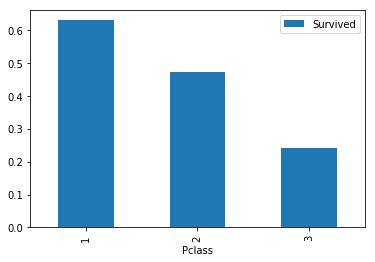

In [239]:
# Observe correlation between Pclass and Survived
print(train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False))
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False).plot(kind='bar')

      Sex  Survived
0  female  0.742038
1    male  0.188908


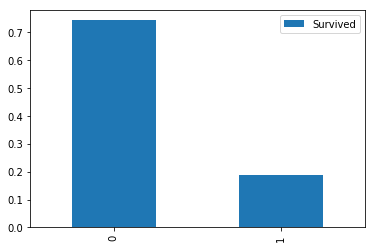

In [244]:
# Observe correlation between Sex and Survived
obs_sex = train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(obs_sex)
obs_sex.plot(kind='bar')

In [209]:
# Observe correlation between SibSp and Survived
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [214]:
# Observe correlation between Parch and Survived
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


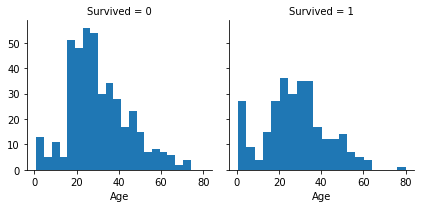

In [233]:
# Plot correlation between Survived and Age
# Observations.

# Infants (Age <=4) had high survival rate.
# Oldest passengers (Age = 80) survived.
# Large number of 15-25 year olds did not survive.
# Most passengers are in 15-35 age range.

g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins = 20)

# train_df[train_df.Survived == 1]['Age'].value_counts().sort_index().plot(kind='bar')

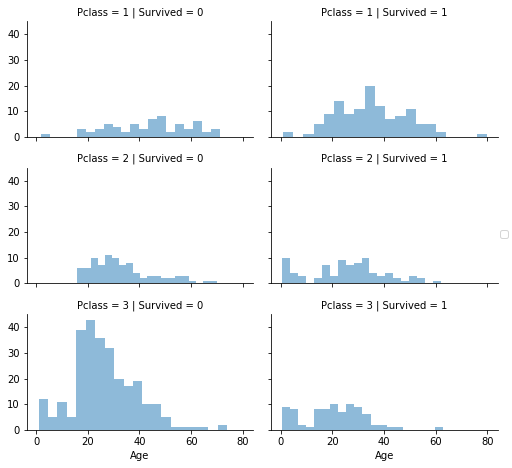

In [219]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

0    77
1    45
Name: Survived, dtype: int64


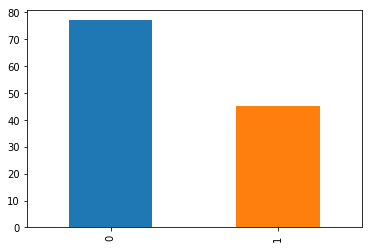

In [264]:
# Observe correlation between Male and Pclass = 1 passengers
# Mostly Male passengers survived
print(train_df[(train_df.Sex == 'male') & (train_df.Pclass == 1)]['Survived'].value_counts())
train_df[(train_df.Sex == 'male') & (train_df.Pclass == 1)]['Survived'].value_counts().plot(kind='bar')

1    91
0     3
Name: Survived, dtype: int64


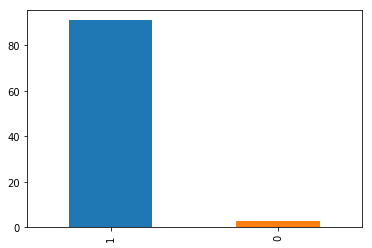

In [268]:
# Observe correlation between female and Pclass = 1 passengers
# Almost all Female Passenger survived
print(train_df[(train_df.Sex == 'female') & (train_df.Pclass == 1)]['Survived'].value_counts())
train_df[(train_df.Sex == 'female') & (train_df.Pclass == 1)]['Survived'].value_counts().plot(kind='bar')

0    91
1    17
Name: Survived, dtype: int64


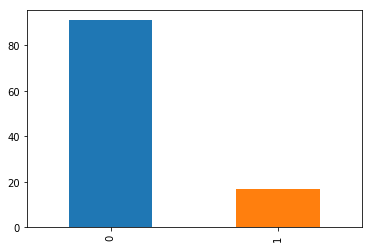

In [266]:
# Observe correlation between male and Pclass = 2 passengers
print(train_df[(train_df.Sex == 'male') & (train_df.Pclass == 2)]['Survived'].value_counts())
train_df[(train_df.Sex == 'male') & (train_df.Pclass == 2)]['Survived'].value_counts().plot(kind='bar')

0    300
1     47
Name: Survived, dtype: int64


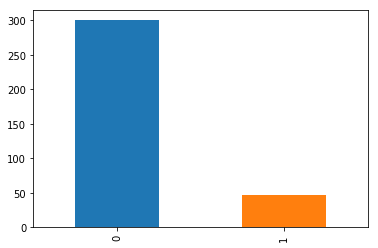

In [269]:
# Observe correlation between male and Pclass = 3 passengers
# Only few male passengers survived
print(train_df[(train_df.Sex == 'male') & (train_df.Pclass == 3)]['Survived'].value_counts())
train_df[(train_df.Sex == 'male') & (train_df.Pclass == 3)]['Survived'].value_counts().plot(kind='bar')

C:\Users\surinder.kumar01\AppData\Local\conda\conda\envs\tf\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


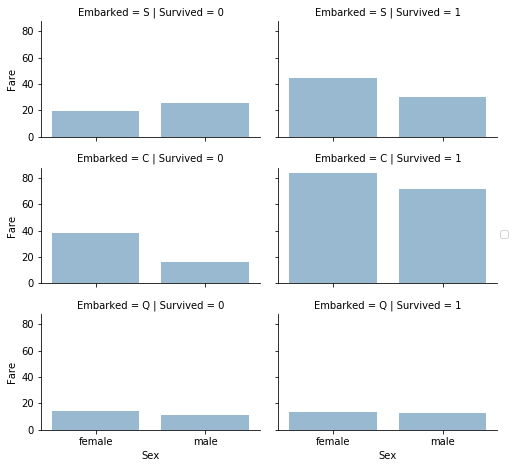

In [270]:
# Correlating Embarked, Sex, Fare, with Survived.
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [280]:
# Now perform data wrangling

# Lets drop features which are not significantly important in prediction
# Drop 'Ticket' and 'Cabin'

print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [281]:
# Now create new features from existing ones.
# Extract first word(title) from the Name feature

# Observations.

# When we plot Title, Age, and Survived, we note the following observations.

# Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
# Survival among Title Age bands varies slightly.
# Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).
# Decision.

# We decide to retain the new Title feature for model training.

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [283]:
# Replace rare title names with "Rare"
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [284]:
# Convert Categorical titles into ordinal

titles_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(titles_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [285]:
# Drop Name, PassengerId feature from training and test dataset

train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [286]:
# Convert categorical feature "Sex" into numerical feature
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male': 0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [287]:
# Now guess missing values for age features

# More accurate way of guessing missing values is to use other correlated features.
# In our case we note correlation among Age, Gender, and Pclass.
# Guess Age values using median values for Age across sets of Pclass and Gender feature combinations.
# So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

# Let us start by preparing an empty array to contain
# guessed Age values based on Pclass x Gender combinations.

guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [289]:
# Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed
# values of Age for the six combinations.

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [290]:
# Now create Age bands and determine correlations with Survived.

train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [291]:
# Now replace Age with ordinals based on these bands.

for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [292]:
# Let's remove AgeBand feature now

train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [295]:
# Now create feature FamilySize which combines Parch and SibSp.
# then drop Parch and SibSp

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [296]:
# Create another feature 'IsAlone'

for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [297]:
# Now drop Parch, SibSp, and FamilySize features in favor of IsAlone.
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [298]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [300]:
# Complete feature 'Embarked'. Fill it with most common port

freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [301]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [302]:
# Now convert Embarked categorical feature into numerical

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [304]:
# Replace the missing values for feature 'fare' with its median

test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [305]:
# Now create fare band range

train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [306]:
# Now convert the fare feature to ordinal values

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [309]:
# Now we can apply various models on this dataset and the check the accuracy

X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']

X_test = test_df.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [314]:
# Apply Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_train, Y_train)


0.8035914702581369

In [323]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287163
4,Embarked,0.261762
6,IsAlone,0.129140
3,Fare,-0.085150
7,Age*Class,-0.311200
0,Pclass,-0.749007


In [324]:
# Apply Support Vector Machine

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = svc.score(X_train, Y_train)
acc_svc

0.8383838383838383

In [325]:
# Apply K-Nearest Neighbors Alogrithm

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = knn.score(X_train, Y_train)
acc_knn

0.8473625140291807

In [326]:
# NB Algorithm
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = gaussian.score(X_train, Y_train)
acc_gaussian

0.7227833894500562

In [327]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = perceptron.score(X_train, Y_train)
acc_perceptron

C:\Users\surinder.kumar01\AppData\Local\conda\conda\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7800224466891134

In [328]:
# Apply Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = sgd.score(X_train, Y_train)
acc_sgd

C:\Users\surinder.kumar01\AppData\Local\conda\conda\envs\tf\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7631874298540965

In [331]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_train, Y_train)
acc_decision_tree

0.867564534231201

In [332]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = random_forest.score(X_train, Y_train)
acc_random_forest

0.867564534231201

In [334]:
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgboost.fit(X_train, Y_train)
Y_pred = xgboost.predict(X_test)
acc_xgboost = xgboost.score(X_train, Y_train)
acc_xgboost

C:\Users\surinder.kumar01\AppData\Local\conda\conda\envs\tf\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\surinder.kumar01\AppData\Local\conda\conda\envs\tf\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8428731762065096

In [336]:
# Model evaluation

models = pd.DataFrame({
    'Model': ['Support Vector Machine', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Stochastic Gradient Descent', 'Decesion Tree', 'XGBoost Classifier'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_sgd, acc_decision_tree, acc_xgboost]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.867565
6,Decesion Tree,0.867565
1,KNN,0.847363
7,XGBoost Classifier,0.842873
0,Support Vector Machine,0.838384
2,Logistic Regression,0.800000
5,Stochastic Gradient Descent,0.763187
4,Naive Bayes,0.722783


**References**

http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf

https://www.kaggle.com/c/titanic/kernels

https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook

https://www.kaggle.com/omarelgabry/a-journey-through-titanic?scriptVersionId=447802

https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling